In [1]:
#Task 1

In [ ]:
#Question 1

In [3]:
#Preprocessing the dataset
import pandas as pd
data = pd.read_csv('titanic-training-data.csv')

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.drop(columns=['Cabin'], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\Manali Parikh\AppData\Local\Temp\ipykernel_5432\918636426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Manali Parikh\AppData\Local\Temp\ipykernel_5432\918636426.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [6]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [8]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [9]:
#dataframe after completing the preprocessing
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,False,True
887,1,1,1,19.0,0,0,30.0000,False,True
888,0,3,1,28.0,1,2,23.4500,False,True
889,1,1,0,26.0,0,0,30.0000,False,False


In [14]:
#Question 2

In [10]:
X = data.drop('Survived', axis=1)
y = data['Survived']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dtree = DecisionTreeClassifier(random_state=0)
grid = GridSearchCV(dtree, params, cv=5)
grid.fit(X, y)
best_tree = grid.best_estimator_

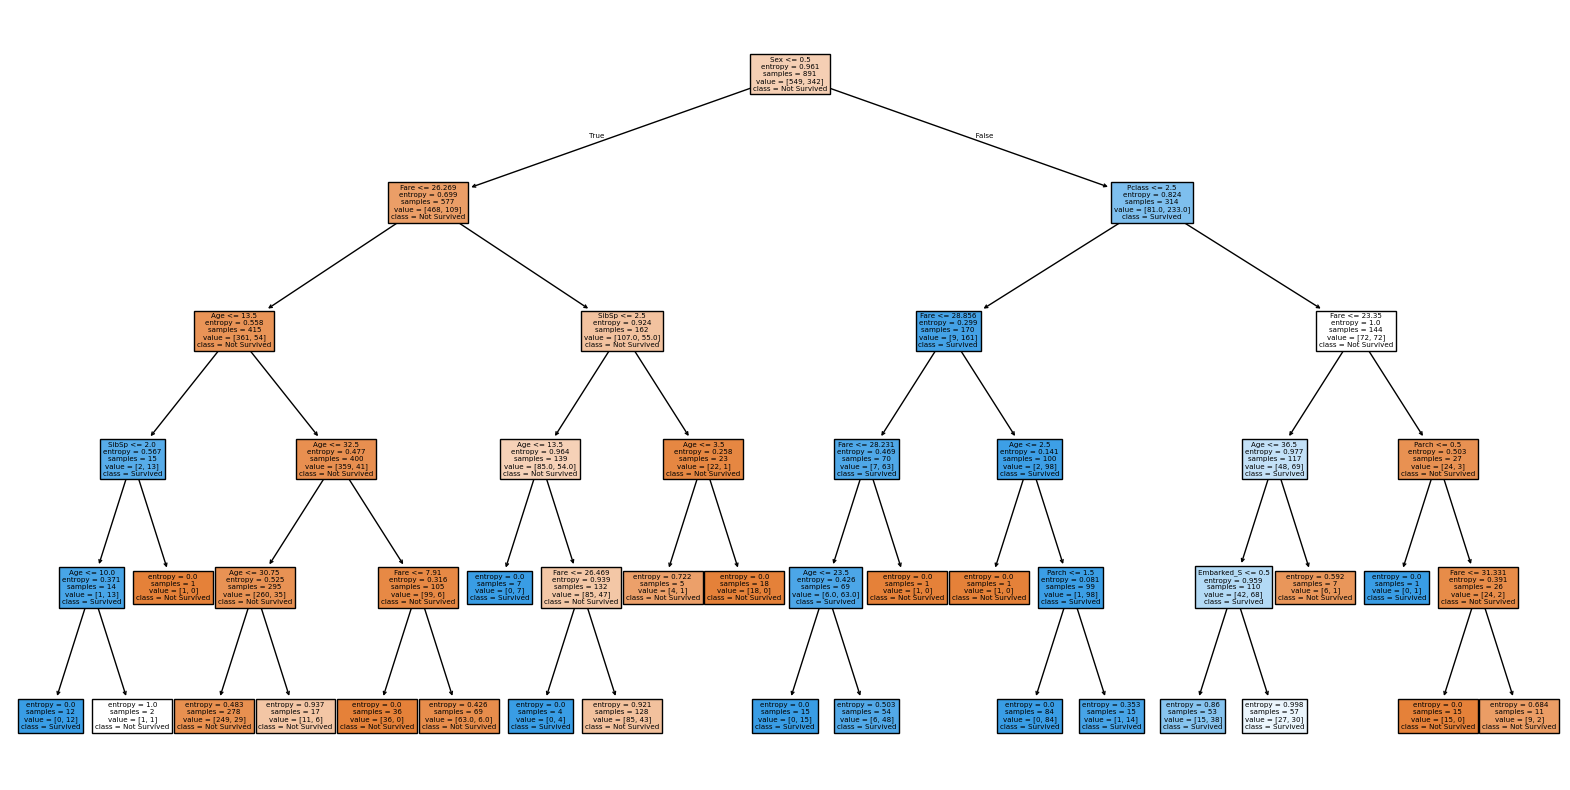

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [15]:
#Question 3

In [20]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(best_tree, X, y, cv=5)
average_accuracy_dt = scores_dt.mean()

print(f"Average accuracy (Decision Tree): {average_accuracy_dt:.4f}")


Average accuracy (Decision Tree): 0.8159


In [21]:
#Question 4

In [22]:
#Fine tuning the Random forest model

from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, params_rf, cv=5)
grid_rf.fit(X, y)
best_rf = grid_rf.best_estimator_


In [23]:
scores_rf = cross_val_score(best_rf, X, y, cv=5)
average_accuracy_rf = scores_rf.mean()
print(f"Average accuracy (Random Forest): {average_accuracy_rf:.4f}")


Average accuracy (Random Forest): 0.8328


In [24]:
# Question 5 is answered in the word file

In [1]:
#Task 6

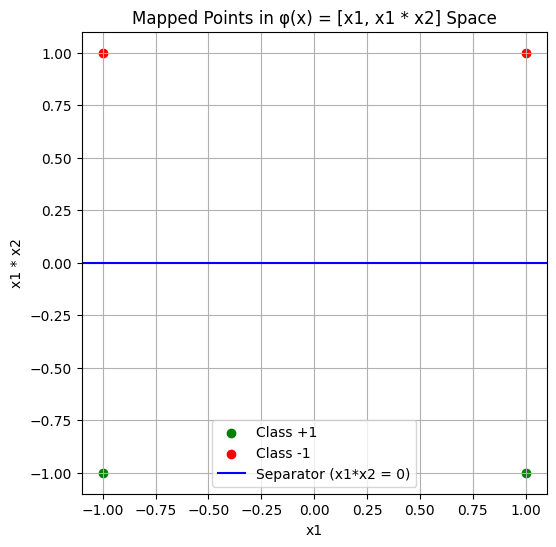

In [3]:
import matplotlib.pyplot as plt

# Original input points and labels
points = [
    (-1, -1, -1),  # class -1
    (-1,  1,  1),  # class +1
    ( 1, -1,  1),  # class +1
    ( 1,  1, -1)   # class -1
]

# Apply the mapping: φ(x) = [x1, x1*x2]
mapped_points = []
for x1, x2, label in points:
    phi_x = (x1, x1 * x2)
    mapped_points.append((phi_x[0], phi_x[1], label))

# Separate points by class
class_pos = [(x, y) for x, y, l in mapped_points if l == 1]
class_neg = [(x, y) for x, y, l in mapped_points if l == -1]

# Plotting
plt.figure(figsize=(6, 6))
if class_pos:
    x_pos, y_pos = zip(*class_pos)
    plt.scatter(x_pos, y_pos, color='green', label='Class +1')
if class_neg:
    x_neg, y_neg = zip(*class_neg)
    plt.scatter(x_neg, y_neg, color='red', label='Class -1')

# Decision boundary: x1 * x2 = 0 → vertical or horizontal line
# In φ-space: x1*x2 is y-axis → so draw horizontal line at y = 0
plt.axhline(0, color='blue', linestyle='-', label='Separator (x1*x2 = 0)')

plt.xlabel("x1")
plt.ylabel("x1 * x2")
plt.title("Mapped Points in φ(x) = [x1, x1 * x2] Space")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#Task 7

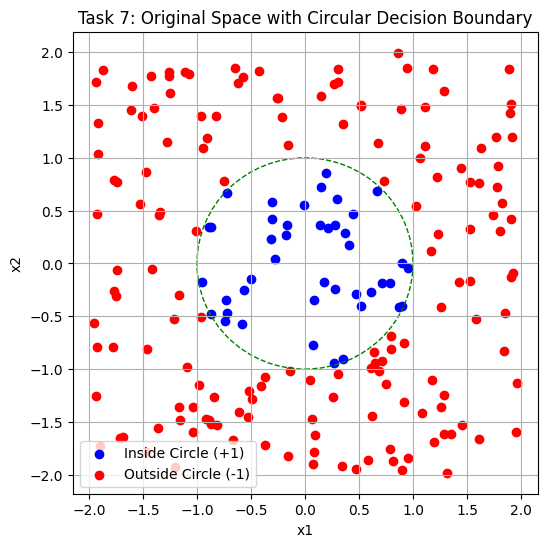

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic circular data
np.random.seed(0)
n = 200
X = np.random.uniform(-2, 2, (n, 2))
y = np.where(X[:, 0]**2 + X[:, 1]**2 < 1.0, 1, -1)  # Points inside circle = +1

# Map to (x1, x2, x1^2, x2^2)
X_mapped = np.column_stack((X[:, 0], X[:, 1], X[:, 0]**2, X[:, 1]**2))

# Train a linear SVM on the mapped features
clf = LinearSVC()
clf.fit(X_mapped, y)

# Plot original space
plt.figure(figsize=(6, 6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='Inside Circle (+1)')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], c='red', label='Outside Circle (-1)')
circle = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.legend()
plt.title("Task 7: Original Space with Circular Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()


In [6]:
#Task 8

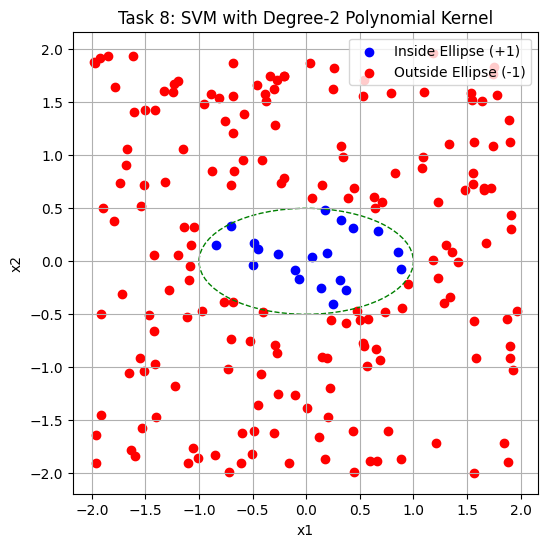

In [7]:
from sklearn.svm import SVC

# Generate ellipse data
a, b = 1.0, 0.5  # Ellipse axes lengths
X = np.random.uniform(-2, 2, (n, 2))
y = np.where((X[:, 0]/a)**2 + (X[:, 1]/b)**2 < 1.0, 1, -1)  # Inside ellipse = +1

# Train SVM with polynomial kernel (degree 2)
clf_poly = SVC(kernel='poly', degree=2, coef0=1)
clf_poly.fit(X, y)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='Inside Ellipse (+1)')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1], c='red', label='Outside Ellipse (-1)')
ellipse = plt.matplotlib.patches.Ellipse((0, 0), 2*a, 2*b, fill=False, edgecolor='green', linestyle='--')
plt.gca().add_artist(ellipse)
plt.title("Task 8: SVM with Degree-2 Polynomial Kernel")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()
